In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
img = Image.open('page.png').convert("L")
arr = (255-np.array(img)[:,50:])/255
arr.shape

(6408, 1042)

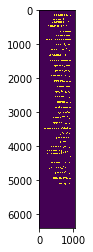

In [20]:
plt.imshow(arr)

In [21]:
def startend(seq):
    starten=[]
    for i in range(1,len(seq)):
        if (seq[i]) & (~seq[i-1]):
            a=i
        elif (~seq[i]) & (seq[i-1]):
            b=i
            starten+=[(a,b)]
    return starten
verd=arr.sum(axis=1)
verbool=[True if i>0 else False for i in verd]
verpairs=startend(verbool)

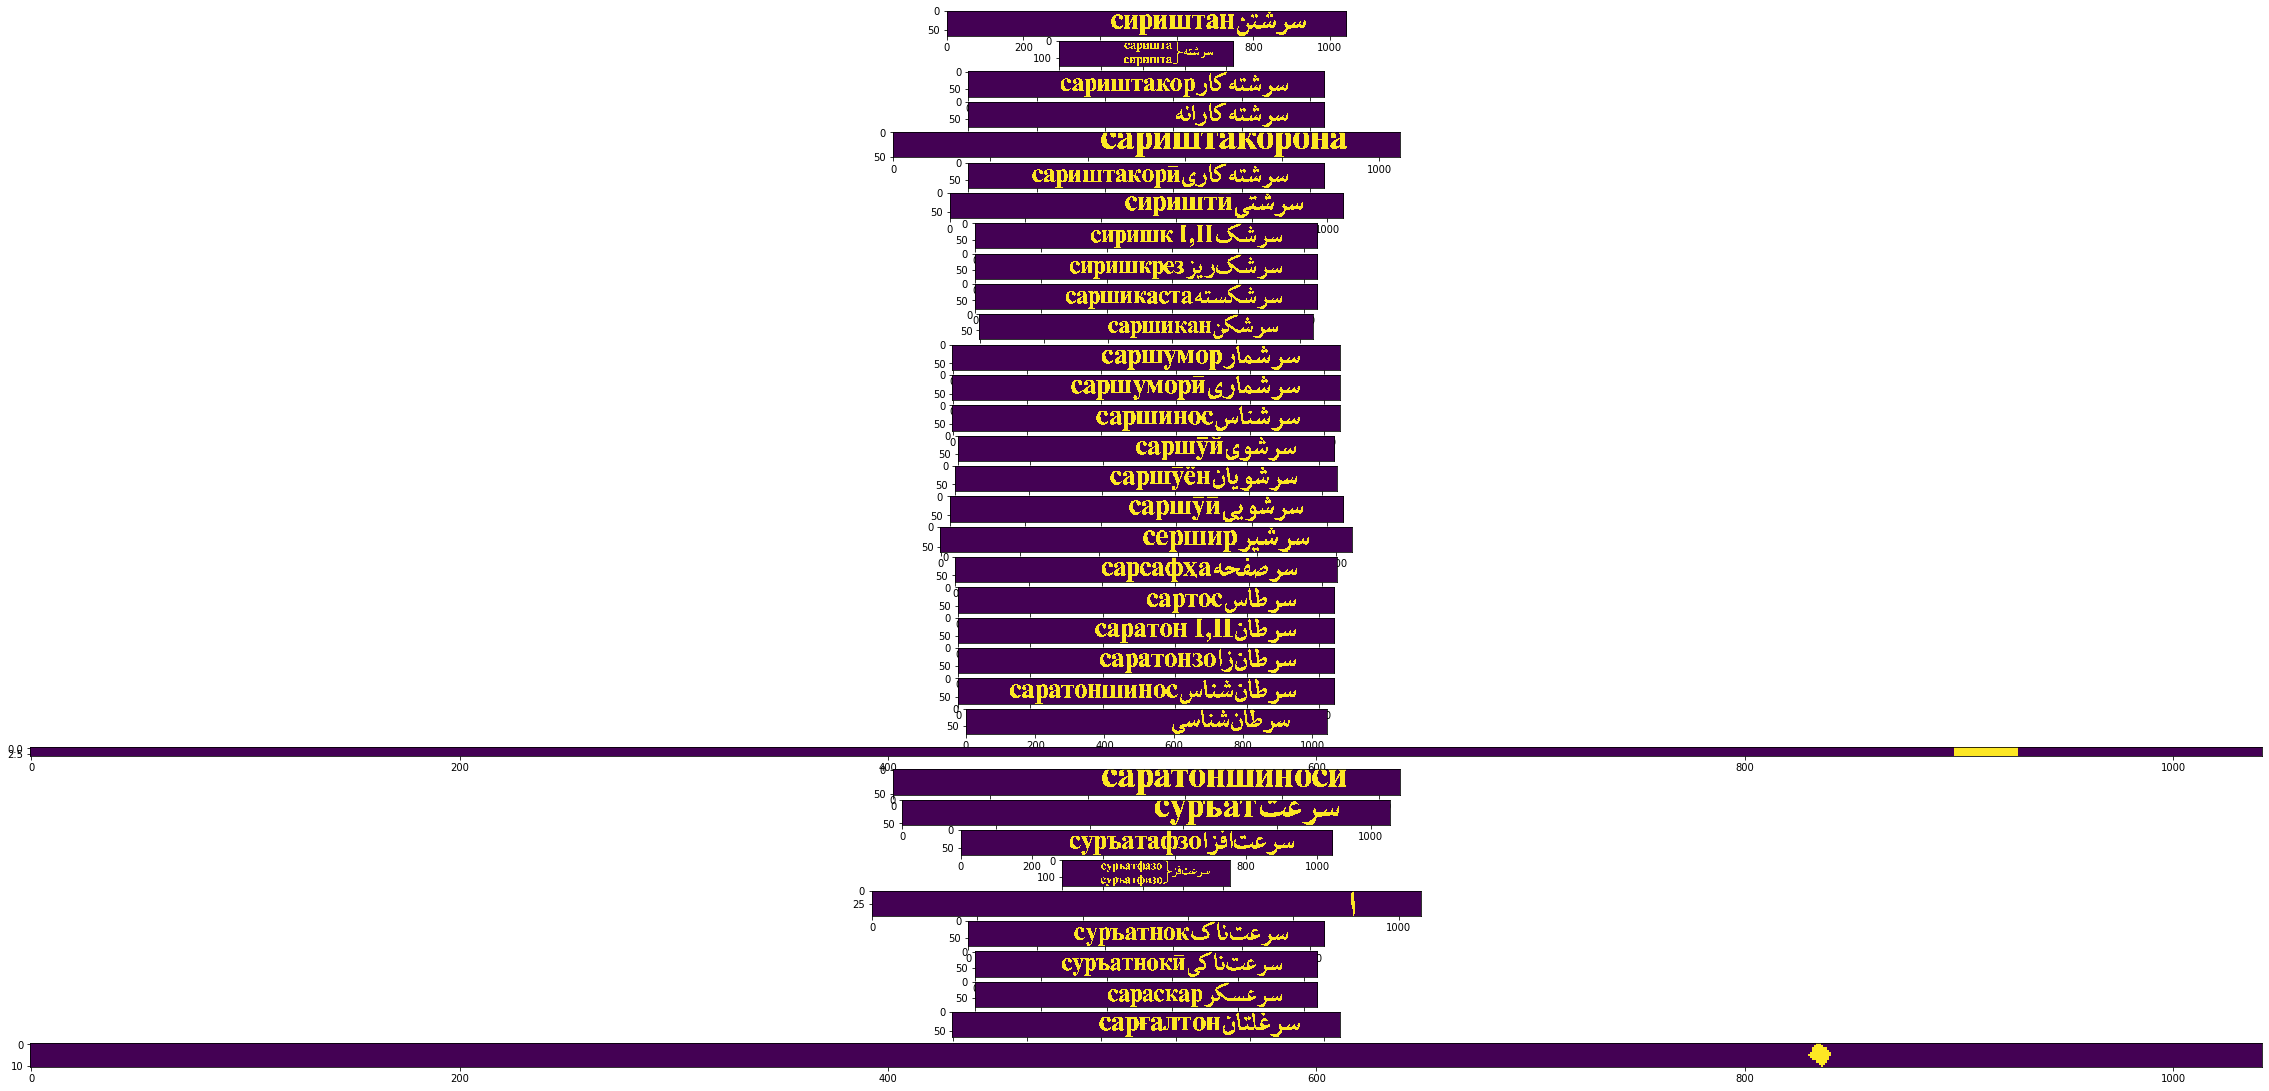

In [24]:
span=-1
plt.figure(figsize=(40,20))
for i,pair in zip(range(len(verpairs[:span])),verpairs[:span]):
    plt.subplot(len(verpairs),1,i+1)
    plt.imshow(arr[pair[0]:pair[1],:])

In [5]:
allpairs=[]
for i,pair in zip(range(len(verpairs[:span])),verpairs[:span]):
    stringd=arr[pair[0]:pair[1],:].sum(axis=0)
    stringdbool=[True if i>0 else False for i in stringd]
    stringdpairs=startend(stringdbool)
    stringpairs=[(pair[0],pair[1],stpair[0],stpair[1]) for stpair in stringdpairs]
    allpairs+=[stringpairs]
    #plt.subplot(len(verpairs),1,i+1)

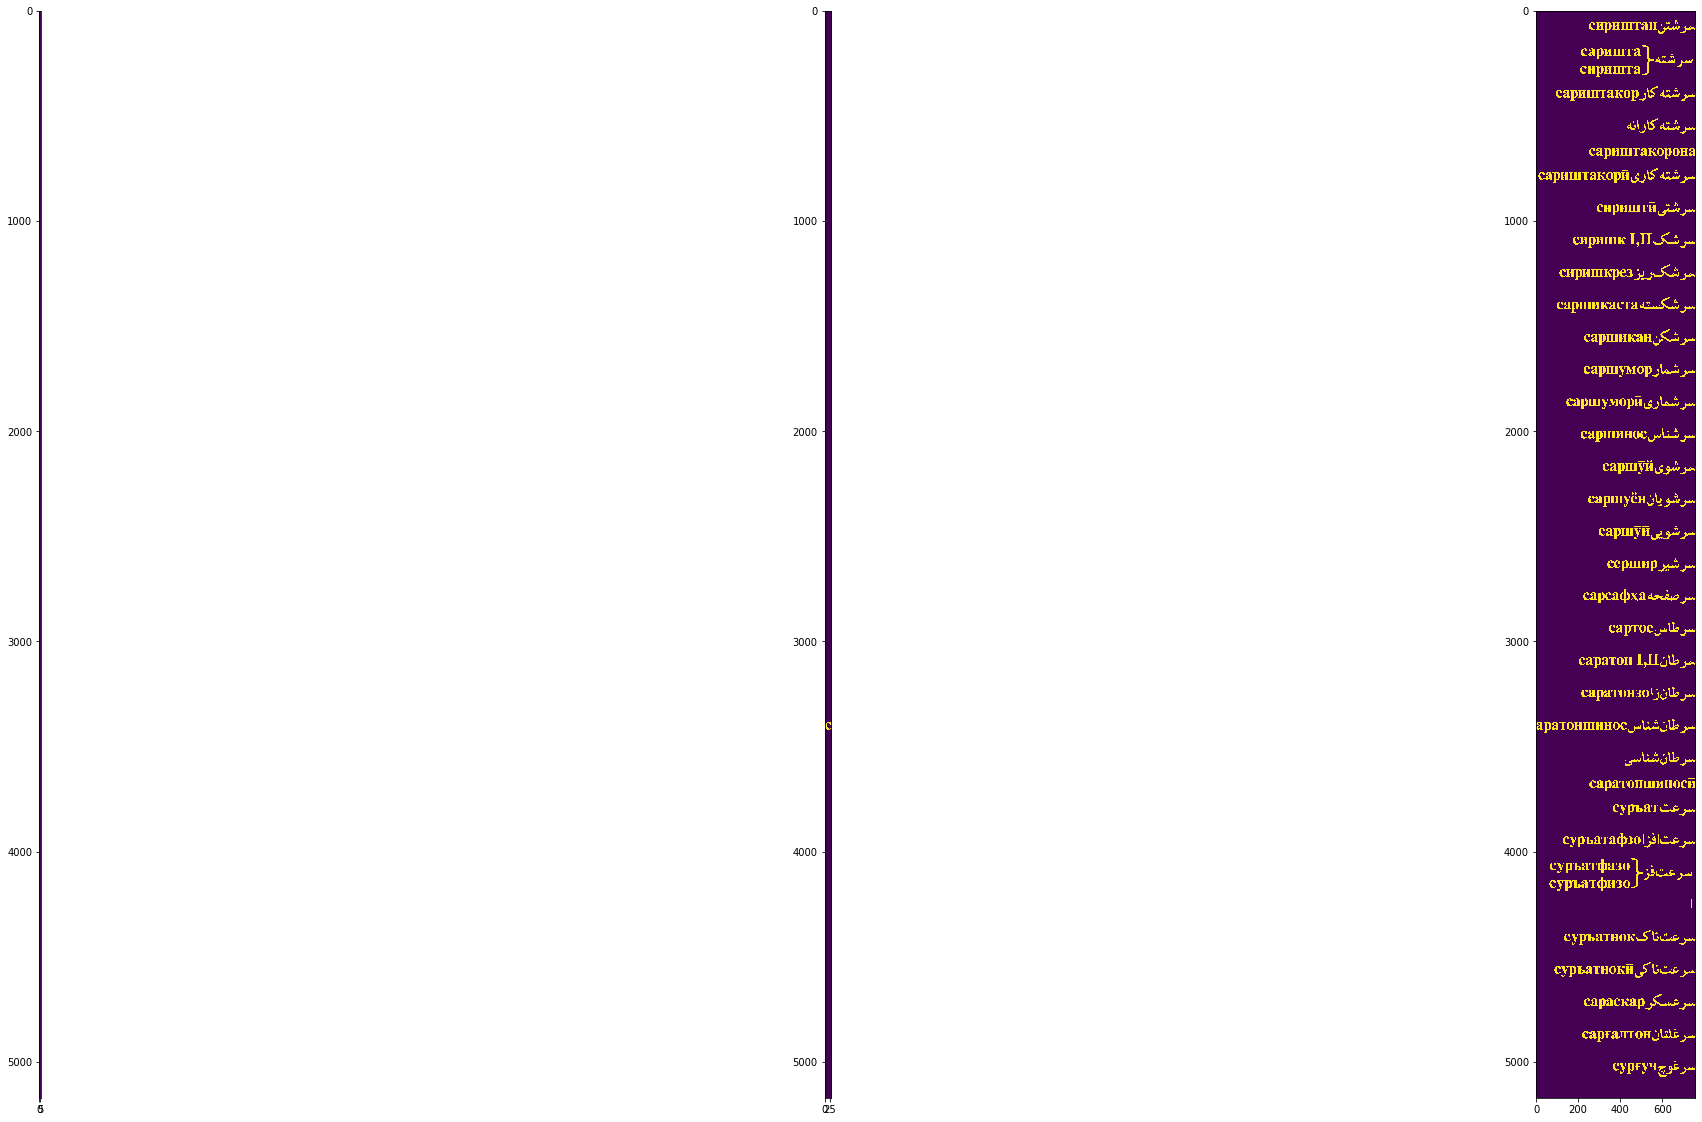

In [6]:
span=2
plt.figure(figsize=(40,20))
i=0
size0=len(allpairs)
size1=max([len(elem) for elem in allpairs])
for linenum,stringline in zip(range(len(allpairs[:span])),allpairs[:span]):
    linestart=i
    for pair in stringline:
        plt.subplot(size0,size1,size1*linenum+i-linestart+1)
        i+=1
        plt.imshow(arr[pair[0]:pair[1],pair[2]:pair[3]])

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## (1) read
def partition(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[:,50:]

    ## (2) threshold
    threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]

    ## (3) minAreaRect on the nozeros


    ## (5) find and draw the upper and lower boundary of each lines
    hist = cv2.reduce(threshed,1, cv2.REDUCE_MAX).reshape(-1)


    th = 0
    H,W = img.shape[:2]
    uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
    lowers = [y+1 for y in range(H-1) if hist[y]>th and hist[y+1]<=th]
    blankscenters=[(i+j)/2 for i,j in zip(uppers[1:],lowers[:-2])]
    blankspans=[(i-j)/2 for i,j in zip(uppers[1:],lowers[:-2])]
    delimiters=[]
    for i in range(len(blankspans)):
        if blankspans[i]>10:
            delimiters+=[int(blankscenters[i])]

    threshed = cv2.cvtColor(threshed, cv2.COLOR_GRAY2BGR)
    for y in uppers:
        cv2.line(threshed, (0,y), (W, y), (255,0,0), 1)

    for y in lowers:
        cv2.line(threshed, (0,y), (W, y), (0,255,0), 1)

    #cv2.imwrite("result.png", threshed)
    #plt.figure(figsize=(20,60))
    delimiters=[0]+delimiters+[H]
    #for i in range(len(delimiters)-1):
    #    plt.subplot(len(delimiters)-1,1,i+1)
    #    plt.imshow(threshed[delimiters[i]:delimiters[i+1],:])
    delimiters=[int(i/25*3) for i in delimiters]
    return delimiters

In [22]:
folder="/home/maxwell/Desktop/Regina Phalange/circumstance/movy/Persian/Tajiki/Farhangi-tafsirii/bycolumns/burst/"
commandstrings=[]
for i in range(1,1481):
    numstring=str(i)
    name="pg_"+"0"*(4-len(numstring))+numstring
    limits=partition(folder+name+".png")
    if(i%10==0):
        print(i)
    for j in range(len(limits)-1):
        h=limits[-1]
        commandstrings+=["pdfcrop --margins '0 -{} 0 -{}' {}.pdf j{}-{}.pdf".format(limits[j], h-limits[j+1],name,name,"0"*(2-len(str(j)))+str(j))]
        #print(commandstrings[-1])
with open(folder+"commands.bash","w") as fout:
    fout.write("\n".join(commandstrings))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480


In [13]:
for i in 


"pdfcrop --margins '0 -5 0 -6' jealous.pdf jealous-5.pdf"